# Decorator Pattern

Decorator Pattern

## Head First Design Patterns example in TypeScript

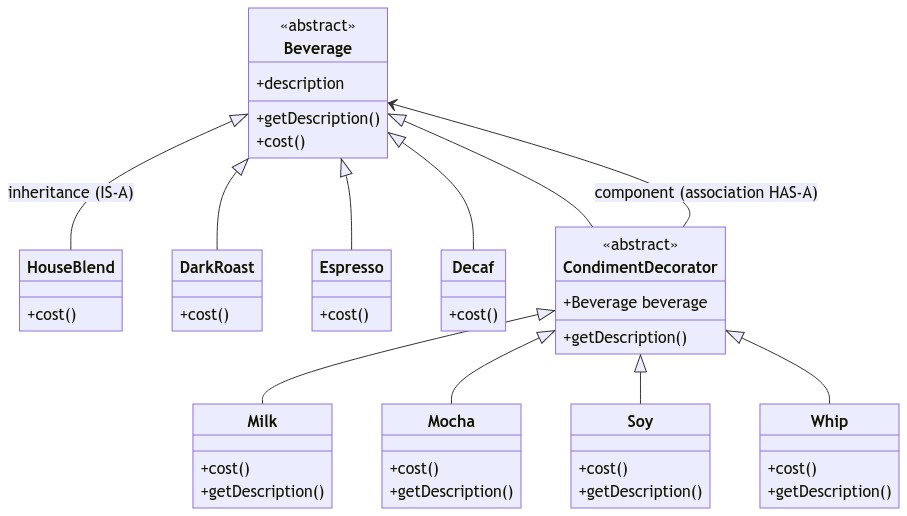


In [ ]:
//#region Code

abstract class Beverage {
  description = 'Unknown Beverage';

  getDescription(): string {
    return this.description;
  }

  abstract cost(): number;
}

//#region Beverages

class HouseBlend extends Beverage {
  constructor() {
    super();
    this.description = 'House Blend Coffee';
  }
  
  cost(): number {
    return .89;
  }
}

class DarkRoast extends Beverage {
  constructor() {
    super();
    this.description = 'Dark Roast Coffee';
  }
  
  cost(): number {
    return .99;
  }
}

class Espresso extends Beverage {
  constructor() {
    super();
    this.description = 'Espresso';
  }
  
  cost(): number {
    return 1.99;
  }
}

class Decaf extends Beverage {
  constructor() {
    super();
    this.description = 'Decaffeinated Coffee';
  }
  
  cost(): number {
    return 1.05;
  }
}

//#endregion

abstract class CondimentDecorator extends Beverage {
  beverage: Beverage;
  abstract getDescription(): string;
}

//#region Condiments

class Milk extends CondimentDecorator {
  constructor(beverage: Beverage) {
    super();
    this.beverage = beverage;
  }
  
  getDescription(): string {
    return this.beverage.getDescription() + ', Steamed Milk';
  }
  cost(): number {
    return this.beverage.cost() + .10;
  }
}

class Mocha extends CondimentDecorator {
  constructor(beverage: Beverage) {
    super();
    this.beverage = beverage;
  }
  
  getDescription(): string {
    return this.beverage.getDescription() + ', Mocha';
  }
  cost(): number {
    return this.beverage.cost() + .20;
  }
}

class Soy extends CondimentDecorator {
  constructor(beverage: Beverage) {
    super();
    this.beverage = beverage;
  }
  
  getDescription(): string {
    return this.beverage.getDescription() + ', Soy';
  }
  cost(): number {
    return this.beverage.cost() + .15;
  }
}

class Whip extends CondimentDecorator {
  constructor(beverage: Beverage) {
    super();
    this.beverage = beverage;
  }
  
  getDescription(): string {
    return this.beverage.getDescription() + ', Whip';
  }
  cost(): number {
    return this.beverage.cost() + .10;
  }
}

//#endregion

//#region Main

(function() {
  const beverage = new Espresso();
  console.log(`${beverage.getDescription()} $${beverage.cost()}`);

  let beverage2 = new DarkRoast();
  beverage2 = new Mocha(beverage2);
  beverage2 = new Mocha(beverage2); // double
  beverage2 = new Whip(beverage2);
  console.log(`${beverage2.getDescription()} $${beverage2.cost()}`);

  let beverage3 = new HouseBlend();
  beverage3 = new Soy(beverage3);
  beverage3 = new Mocha(beverage3);
  beverage3 = new Whip(beverage3);
  console.log(`${beverage3.getDescription()} $${beverage3.cost()}`);
})();

//#endregion

//#endregion

Espresso $1.99
Dark Roast Coffee, Mocha, Mocha, Whip $1.49
House Blend Coffee, Soy, Mocha, Whip $1.34


In [ ]:
// Add sizes exercise

//#region Code

enum Size { TALL, GRANDE, VENTI }; // small, medium, large

abstract class Beverage2 {
  size = Size.TALL;
  description = 'Unknown Beverage';

  getDescription(): string {
    return this.description;
  }

  setSize(size: Size) {
    this.size = size;
  }

  getSize(): Size {
    return this.size;
  }

  abstract cost(): number;
}

class HouseBlend2 extends Beverage2 {
  constructor() {
    super();
    this.description = 'House Blend Coffee';
  }
  
  cost(): number {
    return .89;
  }
}

abstract class CondimentDecorator2 extends Beverage2 {
  beverage: Beverage2;
  abstract getDescription(): string;
}

class Soy2 extends CondimentDecorator2 {
  constructor(beverage: Beverage2) {
    super();
    this.beverage = beverage;
  }
  
  getDescription(): string {
    return this.beverage.getDescription() + ', Soy';
  }
  cost(): number {
    return this.beverage.cost() + this.getCostWithSize();
  }

  private getCostWithSize(): number {
    switch (this.beverage.getSize()) {
      case Size.TALL:
        return .10;
      case Size.GRANDE:
        return .15;
      case Size.VENTI:
        return .20;
      default:
        return .10;
    }
  }
}

//#region Main

(function() {
  const enumToString = (size: Size) => 
    (Object
      .values(Size)
      .filter(v => typeof v === 'string')
      .map(key => { return { id: Size[key], type: key }; })
      .filter(v => v.id === size)
      .map(v => v.type)
    )[0];

  let beverage = new HouseBlend();
  beverage = new Soy(beverage);
  console.log(`${beverage.getDescription()} $${beverage.cost()} (old price)`);

  let beverage2 = new HouseBlend2();
  beverage2 = new Soy2(beverage2);
  console.log(`${beverage2.getDescription()} $${beverage2.cost()} size: ${enumToString(beverage2.getSize())}`);

  let beverage3 = new HouseBlend2();
  beverage3 = new Soy2(beverage3);
  beverage3.setSize(Size.GRANDE);
  console.log(`${beverage3.getDescription()} $${beverage3.cost()} size: ${enumToString(beverage3.getSize())}`);

  let beverage4 = new HouseBlend2();
  beverage4 = new Soy2(beverage4);
  beverage4.setSize(Size.VENTI);
  console.log(`${beverage4.getDescription()} $${beverage4.cost()} size: ${enumToString(beverage4.getSize())}`);
})();

//#endregion

//#endregion

House Blend Coffee, Soy $1.04 (old price)
House Blend Coffee, Soy $0.99 size: TALL
House Blend Coffee, Soy $0.99 size: GRANDE
House Blend Coffee, Soy $0.99 size: VENTI


## Refactoring Guru Decorator Pattern in TypeScript

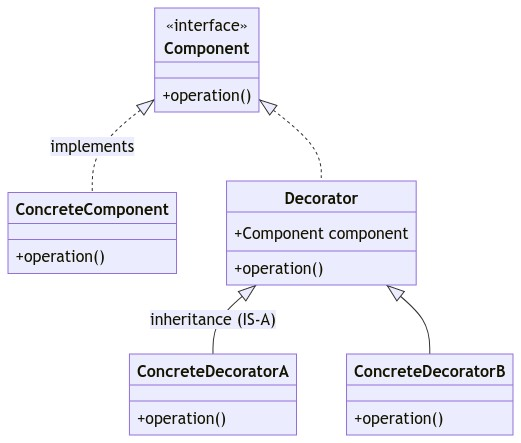

In [ ]:
//#region Code

/**
 * The base Component interface defines operations that can be altered by
 * decorators.
 */
interface Component {
  operation(): string;
}

/**
* Concrete Components provide default implementations of the operations. There
* might be several variations of these classes.
*/
class ConcreteComponent implements Component {
  public operation(): string {
      return 'ConcreteComponent';
  }
}

/**
* The base Decorator class follows the same interface as the other components.
* The primary purpose of this class is to define the wrapping interface for all
* concrete decorators. The default implementation of the wrapping code might
* include a field for storing a wrapped component and the means to initialize
* it.
*/
class Decorator implements Component {
  protected component: Component;

  constructor(component: Component) {
      this.component = component;
  }

  /**
   * The Decorator delegates all work to the wrapped component.
   */
  public operation(): string {
      return this.component.operation();
  }
}

/**
* Concrete Decorators call the wrapped object and alter its result in some way.
*/
class ConcreteDecoratorA extends Decorator {
  /**
   * Decorators may call parent implementation of the operation, instead of
   * calling the wrapped object directly. This approach simplifies extension
   * of decorator classes.
   */
  public operation(): string {
      return `ConcreteDecoratorA(${super.operation()})`;
  }
}

/**
* Decorators can execute their behavior either before or after the call to a
* wrapped object.
*/
class ConcreteDecoratorB extends Decorator {
  public operation(): string {
      return `ConcreteDecoratorB(${super.operation()})`;
  }
}

/**
* The client code works with all objects using the Component interface. This
* way it can stay independent of the concrete classes of components it works
* with.
*/
function clientCode(component: Component) {
  // ...

  console.log(`RESULT: ${component.operation()}`);

  // ...
}

/**
* This way the client code can support both simple components...
*/
const simple = new ConcreteComponent();
console.log('Client: I\'ve got a simple component:');
clientCode(simple);
console.log('');

/**
* ...as well as decorated ones.
*
* Note how decorators can wrap not only simple components but the other
* decorators as well.
*/
const decorator1 = new ConcreteDecoratorA(simple);
const decorator2 = new ConcreteDecoratorB(decorator1);
console.log('Client: Now I\'ve got a decorated component:');
clientCode(decorator2);

//#endregion

Client: I've got a simple component:
RESULT: ConcreteComponent

Client: Now I've got a decorated component:
RESULT: ConcreteDecoratorB(ConcreteDecoratorA(ConcreteComponent))
